Mean Squared Error: 275148.37750753766


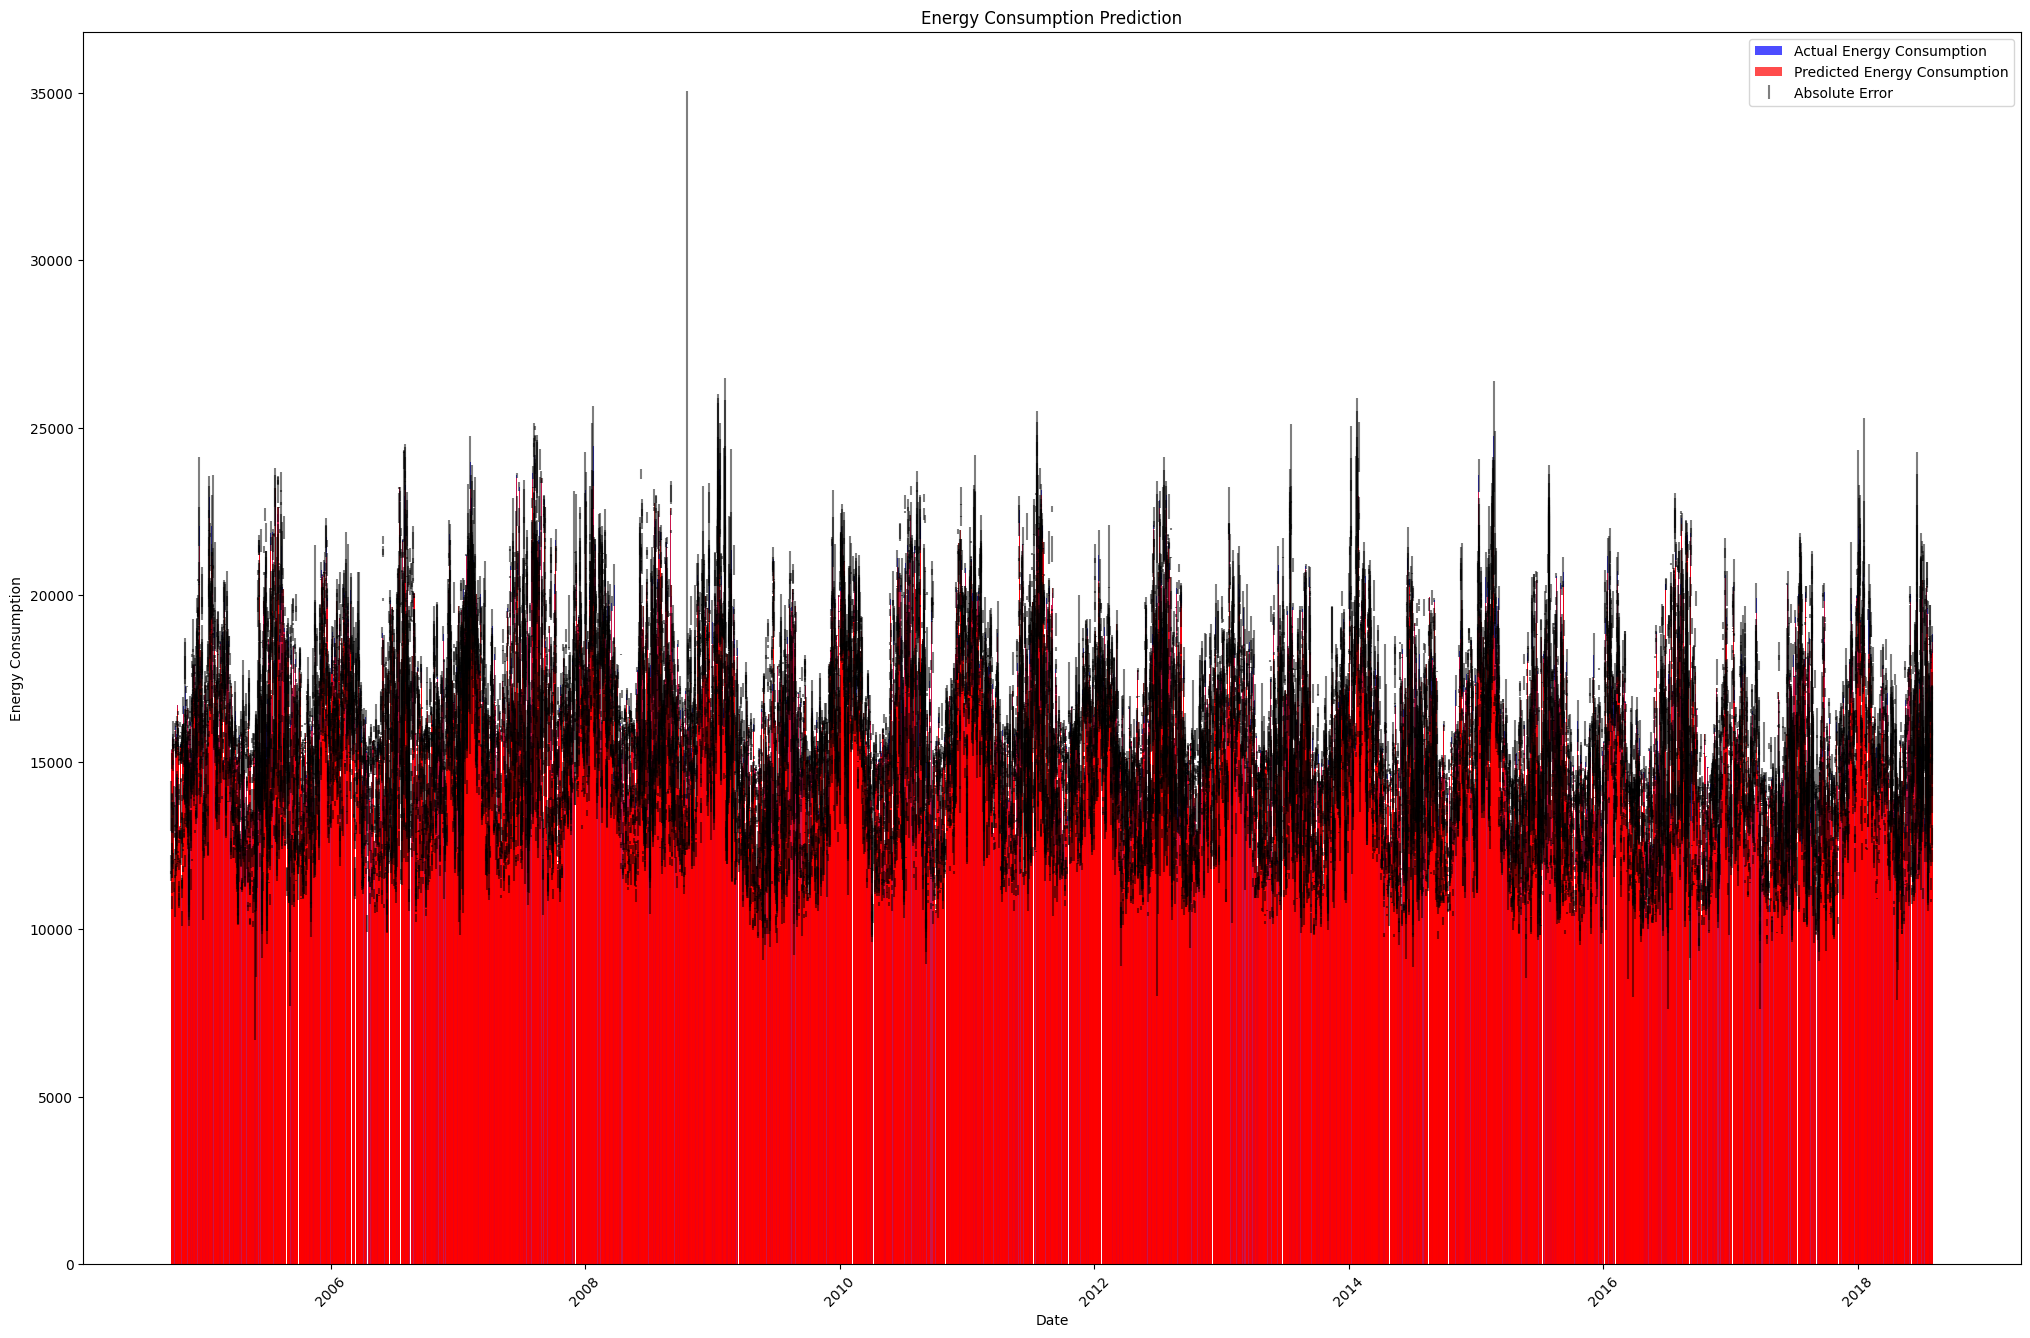

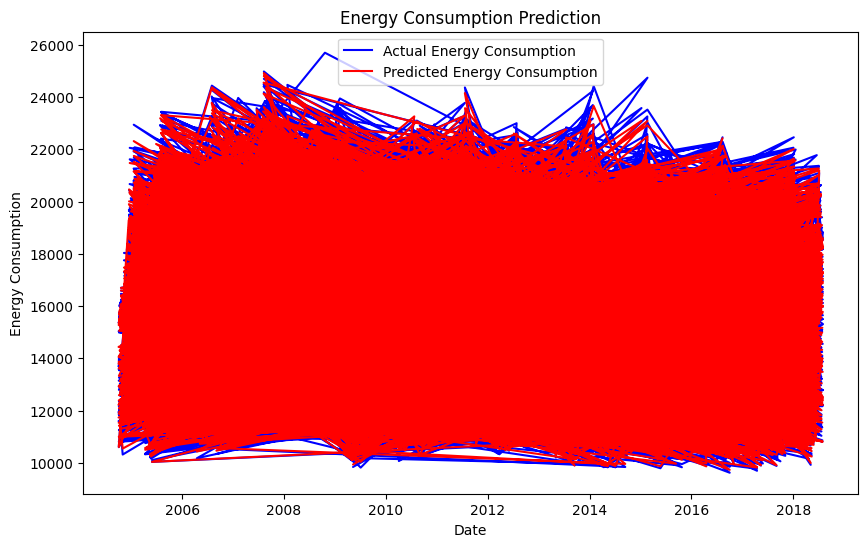

Future Demand Forecast for the next 24 hours:
[19748.2  19707.5  19678.93 19772.91 19975.02 20264.68 20506.57 19800.73
 22613.28 22618.13 22395.59 21798.82 21118.66 20528.04 20054.05 19601.35
 19409.23 19734.97 21032.98 21639.99 21832.69 21891.47 21645.08 21047.14]


C:\Users\Prasad Shree\AppData\Local\Temp\ipykernel_25612\2110705329.py:98: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  future_dates = pd.date_range(start=data.index[-1], periods=24, freq='H')


In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load historical energy consumption data (replace with your dataset)
data = pd.read_csv('A:Csv_files/Energy_hourly.csv')
data

# Preprocess the data
data['Datetime'] = pd.to_datetime(data['Datetime'])
data.set_index('Datetime', inplace=True)

# Feature engineering: Extracting useful features from the date
data['Year'] = data.index.year
data['Month'] = data.index.month
data['Day'] = data.index.day
data['Weekday'] = data.index.weekday
data['Hour'] = data.index.hour

# Split data into training and testing sets
X = data[['Year', 'Month', 'Day', 'Weekday', 'Hour']]
y = data['AEP_MW']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a machine learning model for demand forecasting 
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Visualize the predicted vs. actual energy consumption
# Calculate the absolute error between actual and predicted energy consumption
absolute_error = np.abs(y_test - y_pred)

# Plot the bar plot
plt.figure(figsize=(25, 16))

# Plot actual energy consumption
plt.bar(y_test.index, y_test, label='Actual Energy Consumption', color='blue', alpha=0.7)

# Plot predicted energy consumption
plt.bar(y_test.index, y_pred, label='Predicted Energy Consumption', color='red', alpha=0.7)

# Plot absolute error as error bars
plt.errorbar(y_test.index, y_test, yerr=absolute_error, fmt='none', ecolor='black', alpha=0.5, label='Absolute Error')

# Set plot title and labels
plt.title('Energy Consumption Prediction')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.show()

"""
fig = plt.figure()

ax1= fig.add_subplot(111)

x = data['Datetime']
y = y_test

y1 = y_pred

plt.plot(x,y, color="green")
plt.plot(x,y1, color="red")
# beautify the x-labels
plt.gcf().autofmt_xdate()
plt.xlabel('Date')
plt.ylabel("Power in MW")
plt.title("Machine Learned the Pattern Predicting Future Values ")
plt.legend()
plt.show()
"""
# Visualize the predicted vs. actual energy consumption
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual Energy Consumption', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Energy Consumption', color='red')
plt.title('Energy Consumption Prediction')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.legend()
plt.show()

#the trained model for future demand forecasting
# Suppose you want to forecast energy consumption for the next 24 hours
future_dates = pd.date_range(start=data.index[-1], periods=24, freq='H')
future_data = pd.DataFrame({
    'Year': future_dates.year,
    'Month': future_dates.month,
    'Day': future_dates.day,
    'Weekday': future_dates.weekday,
    'Hour': future_dates.hour
})

future_predictions = model.predict(future_data)

print("Future Demand Forecast for the next 24 hours:")
print(future_predictions)